## Лабораторна робота номер 4
Спочатку я імпортую бібліотеки і завантажую данні. Вирішив використовувати 7 лист - Пульс.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import *
import sklearn
import pandas as pd
import scipy
from scipy import *
import numpy as np

In [2]:
sheet7 = pd.read_excel('data_lab4.xlsx', sheet_name='7')
sheet7

Пульс (PS)  t36  t35  t34  t33  t32
0            1  104   99   82   77   54
1            2   84   76   84   77   56
2            3   79   78   79   80   59
3            4   79   82   79   67   50
4            5   78   88   78   66   49
5            6   78   81   78   68   48
6            7   76   67   76   66   44
7            8   76   74   76   67   46
8            9  120   98   82   72   47
9           10   81   76   81   67   50
10          11   80   78   80   66   48
11          12   99   82   78   68   47
12          13   76   88   76   66   49
13          14  100   90   76   68   47
14          15   76   76   70   69   48
15          16   99   74   78   70   50
16          17   82   81   82   66   42
17          18   80   80   80   67   45
18          19  120  100   76   66   43
19          20   86   82   76   67   44
20          21   86   82   78   68   45
21          22   99   88   67   66   51
22          23   78   77   73   62   59
23          24   66   60   55   55   48
24          25   77   71   58   51   43
25          26   66   60   58   55   46
26          27   78   74   68   60   55
27          28  100   77   87   56   45
28          29   77   73   63   51   44

In [3]:
data = sheet7.drop(['Пульс (PS)'], axis=1)
names = sheet7['Пульс (PS)']
data.head()

t36  t35  t34  t33  t32
0  104   99   82   77   54
1   84   76   84   77   56
2   79   78   79   80   59
3   79   82   79   67   50
4   78   88   78   66   49

Тепер виводжу попарні графіки відношення щодо кожного показника. Несказати що десь можна побачити чіткі класи, але можна виділити конкретні пари - т36т35 (розділення десь по середині прямою паралельною до осі х), т32т33(Є велике скупчення і декілька маленьких), т34т33 (Зверху зправа видно більш шільне скупчення ніж у всіх ніших данних). 

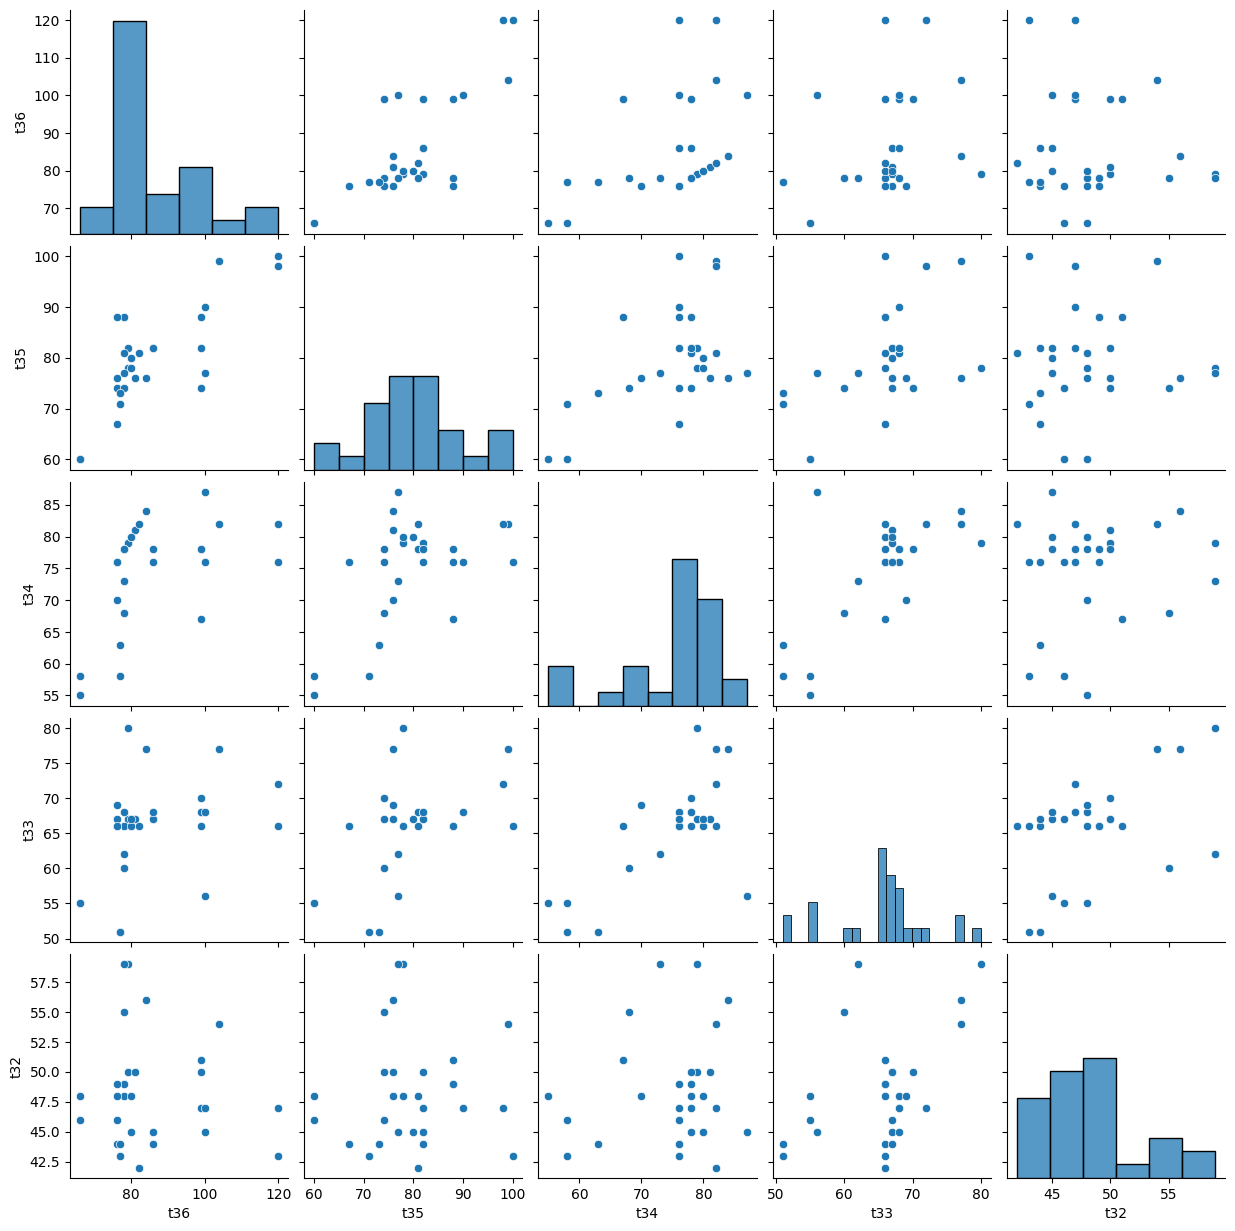

In [17]:
sns.pairplot(data)

Далі виводимо графік паралельних координат. У ньому доволі чітко видно группу скупчених прямих з приблизно однаковою динамікою в центрі та дві більш розріджені групи зверху та знизу від неї. Вважаю що з вигляду цього графіку доцільно розбивати на 2-3 кластери. (Поки буде 3)

<Axes: >

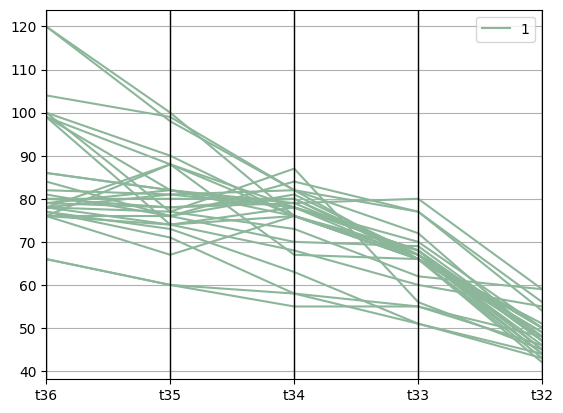

In [4]:
X = data.copy()
data['class'] = 1
pd.plotting.parallel_coordinates(data, 'class', cols=X.columns)

# K-means
Використовуючи K-means проводжу кластеризацію данних на 3 класи.

In [18]:
modelKmeans = cluster.KMeans(n_clusters=3, init='k-means++', n_init=20)
modelKmeans.fit(X)
data['class_KM'] = modelKmeans.labels_

Після кластеризації вийшло саме так як я і припускав - є один центральний клас з доволі скупченим розташуванням та два більш розрідженні класи зверху і знизу. Виглядає доволі органічно.

<Axes: >

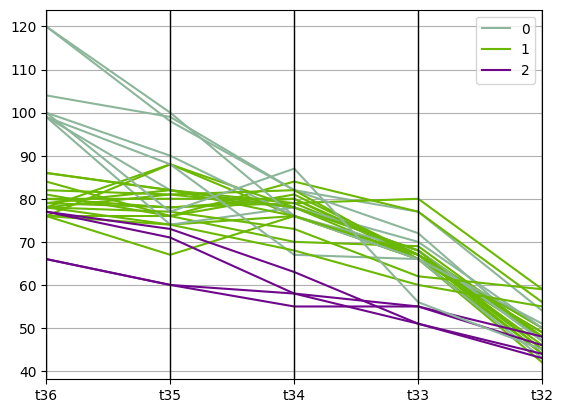

In [19]:
pd.plotting.parallel_coordinates(data, 'class_KM', cols=X.columns)

Потім виводжу попарні графіки. Після їх перегляду вже з'являєтся почуття що три класи то забагато. На графіку т36т35 та т36т32 це доволі чітко видно, але з іншого боку на графіках т33т34 та т34т35 усе виглядає органічно. Можливо k-means просто не найкращий метод для розподілення цих данних.

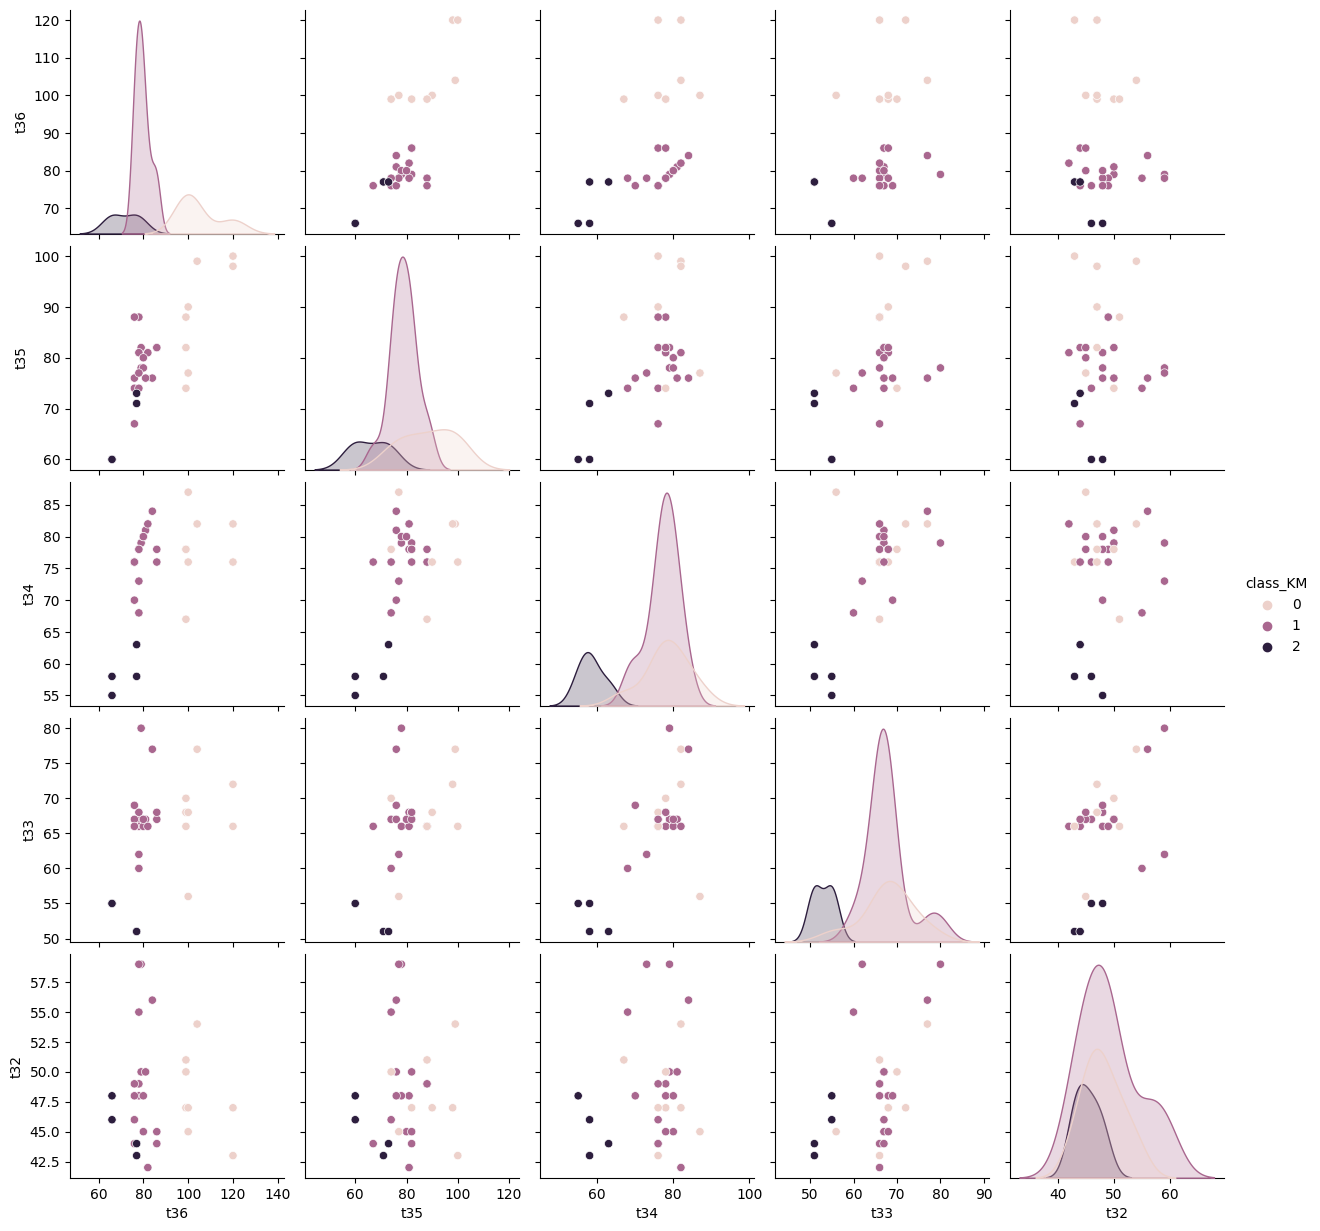

In [20]:
sns.pairplot(data, hue='class_KM', vars=X.columns)

Доволі цікаво - усі три використані показника вказують що якнайменше для k-means 3 кластери є оптімальною кількістю. Вважаю що у тако випадку по k-means усе.

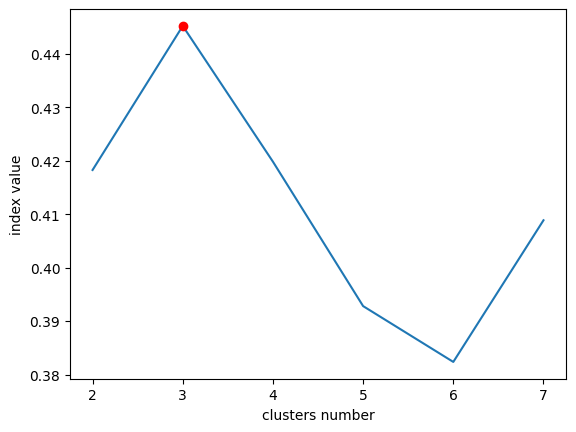

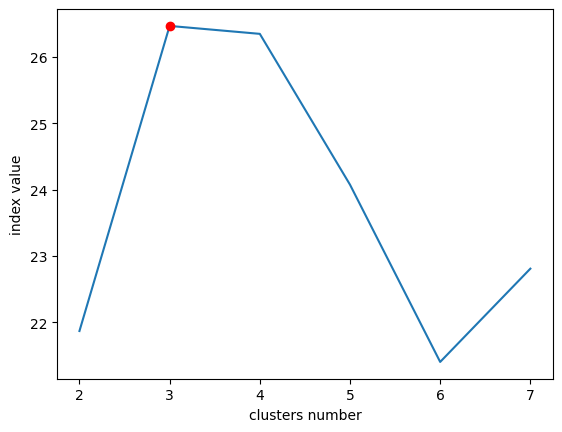

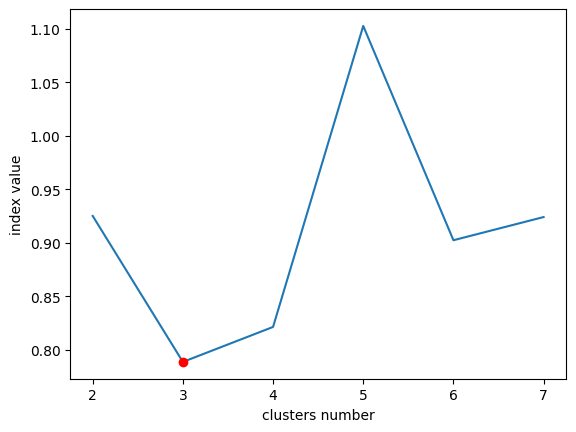

In [34]:
#silhouette_score, calinski_harabasz_score, davies_bouldin_score (min)

k_range = range(2, 8)

indValsSil = []
for k in k_range:
    lables = cluster.KMeans(n_clusters=k, init='k-means++', n_init=8).fit_predict(X)
    indValsSil.append(silhouette_score(X, lables))

indValsCH = []
for k in k_range:
    lables = cluster.KMeans(n_clusters=k, init='k-means++', n_init=8).fit_predict(X)
    indValsCH.append(calinski_harabasz_score(X, lables))

indValsDB = []
for k in k_range:
    lables = cluster.KMeans(n_clusters=k, init='k-means++', n_init=8).fit_predict(X)
    indValsDB.append(davies_bouldin_score(X, lables))

plt.plot(k_range, indValsSil)
bestSil = np.argmax(indValsSil)
plt.plot(k_range[bestSil], indValsSil[bestSil], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index value")
plt.show()

plt.plot(k_range, indValsCH)
bestCH = np.argmax(indValsCH)
plt.plot(k_range[bestCH], indValsCH[bestCH], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index value")
plt.show()

plt.plot(k_range, indValsDB)
bestDB = np.argmin(indValsDB)
plt.plot(k_range[bestDB], indValsDB[bestDB], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index value")
plt.show()

# EM

Тепер спробую алгоритм максимізації очікування. Як видно графік з виділенням трьох кластерів тут трішки гірший за k-means - є один великий кластер і два маленькі кластери, один з них (фіолетовий на графіку паралельних кординат) виглядеє органічно і уособлено, другий же навпаки виглядає скоріше як шум. він доволі погано відділений від основної маси. Його краще або взагалі прибрати або збільшити за рахунок схожих з ним за динамікою членів зеленого класу (старт зі 100) як в варіанті k-means.

In [8]:
modelEM = mixture.GaussianMixture(n_components=3, init_params='k-means++', n_init=5)
modelEM.fit(X)
data['class_EM3'] = modelEM.predict(X)

<Axes: >

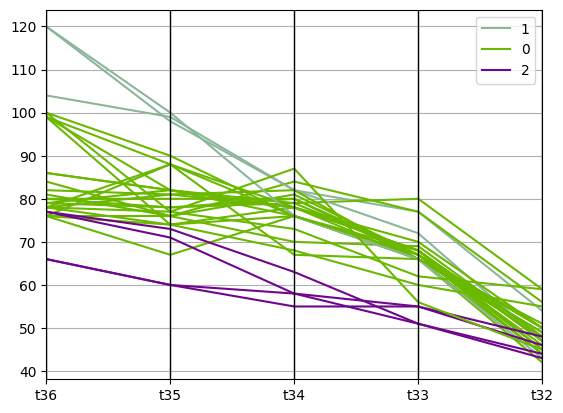

In [9]:
pd.plotting.parallel_coordinates(data, 'class_EM3', cols=X.columns)

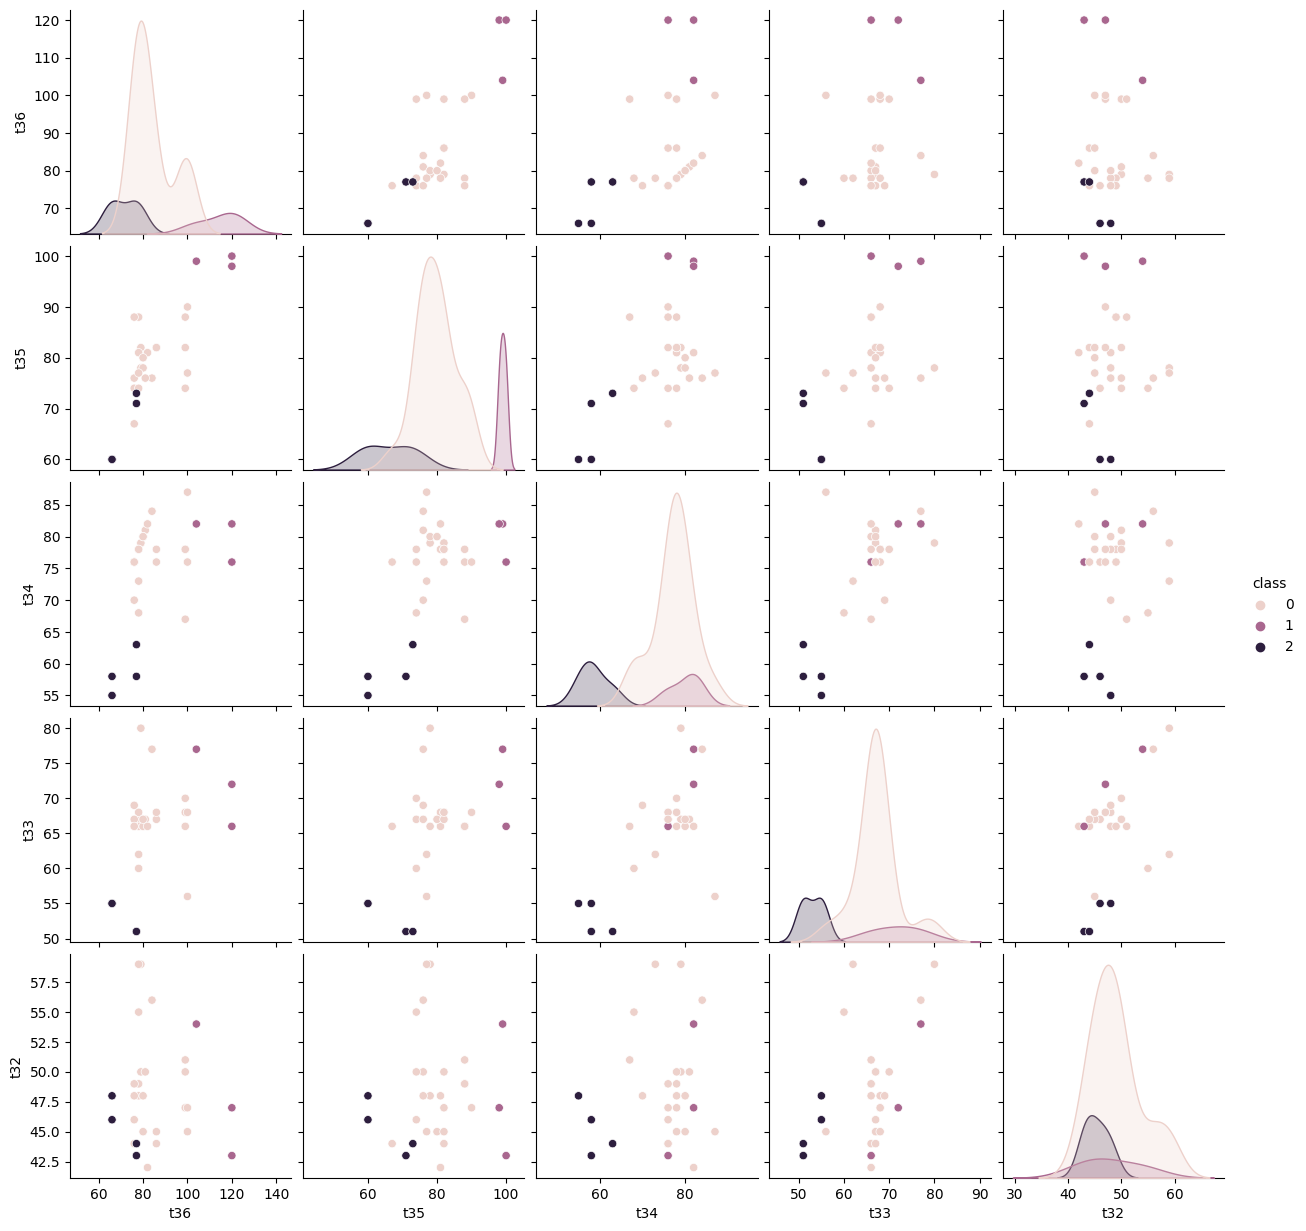

In [10]:
sns.pairplot(data, hue='class_EM3', vars=X.columns)

Після перевірки показниками отримуємо що їх результати сильно розійшлись. Вважаю доцільним подивитися на на графік з 2, 4 та 6(aic, bic) кластерів

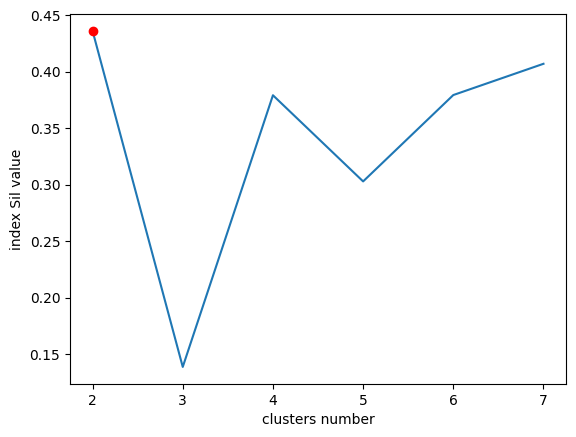

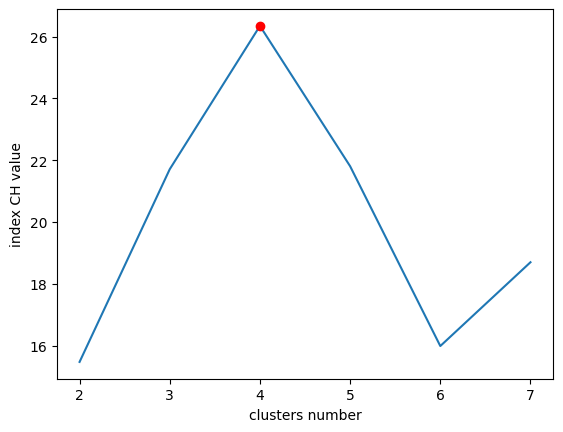

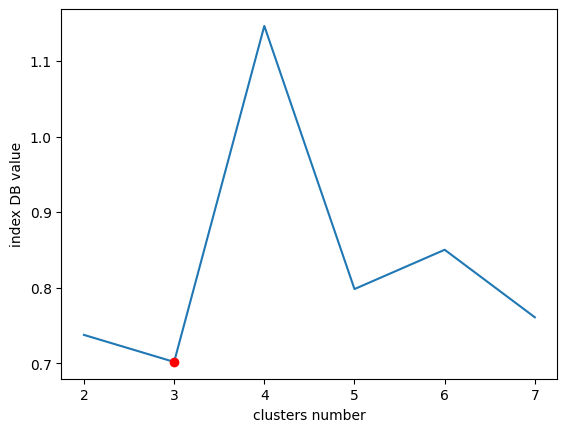

In [32]:
k_range = range(2, 8)

indValsSil = []
for k in k_range:
    lables = mixture.GaussianMixture(n_components=k, init_params='k-means++', n_init=8).fit_predict(X)
    indValsSil.append(silhouette_score(X, lables))

indValsCH = []
for k in k_range:
    lables = mixture.GaussianMixture(n_components=k, init_params='k-means++', n_init=8).fit_predict(X)
    indValsCH.append(calinski_harabasz_score(X, lables))

indValsDB = []
for k in k_range:
    lables = mixture.GaussianMixture(n_components=k, init_params='k-means++', n_init=8).fit_predict(X)
    indValsDB.append(davies_bouldin_score(X, lables))

plt.plot(k_range, indValsSil)
bestSil = np.argmax(indValsSil)
plt.plot(k_range[bestSil], indValsSil[bestSil], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index Sil value")
plt.show()

plt.plot(k_range, indValsCH)
bestCH = np.argmax(indValsCH)
plt.plot(k_range[bestCH], indValsCH[bestCH], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index CH value")
plt.show()

plt.plot(k_range, indValsDB)
bestDB = np.argmin(indValsDB)
plt.plot(k_range[bestDB], indValsDB[bestDB], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index DB value")
plt.show()

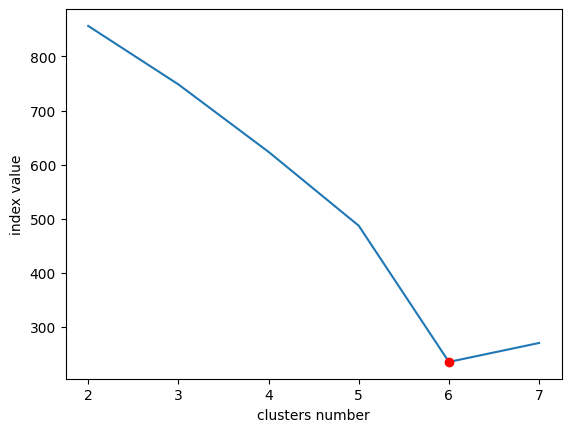

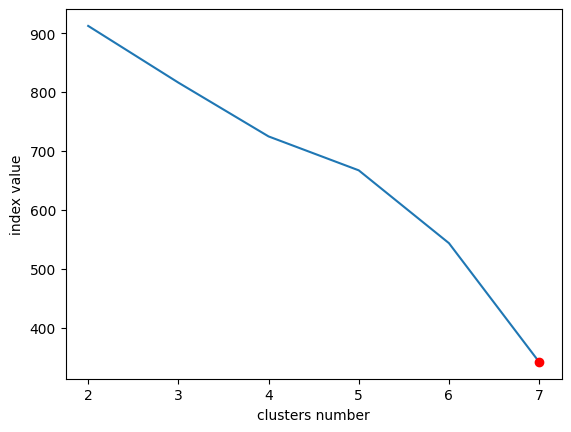

In [34]:
k_range = range(2, 8)

indValsAIC = []
for k in k_range:
    model = mixture.GaussianMixture(n_components=k, init_params='k-means++', n_init=8).fit(X)
    indValsAIC.append(model.aic(X))

plt.plot(k_range, indValsAIC)
bestAIC = np.argmin(indValsAIC)
plt.plot(k_range[bestAIC], indValsAIC[bestAIC], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index value")
plt.show()

indValsBIC = []
for k in k_range:
    model = mixture.GaussianMixture(n_components=k, init_params='k-means++', n_init=8).fit(X)
    indValsBIC.append(model.bic(X))

plt.plot(k_range, indValsBIC)
bestBIC = np.argmin(indValsBIC)
plt.plot(k_range[bestBIC], indValsBIC[bestBIC], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index value")
plt.show()

При виділенні усього двох кластерів отримуємо очікувану картину - виділений основний великий клас з середніми показниками пульсу і маленький з низчими показниками. Усі графіки виглядають органічно вважаю одним з найкращих і наочніших розділень.

In [32]:
modelEM = mixture.GaussianMixture(n_components=2, init_params='k-means++', n_init=5)
modelEM.fit(X)
data['class_EM2'] = modelEM.predict(X)

<Axes: >

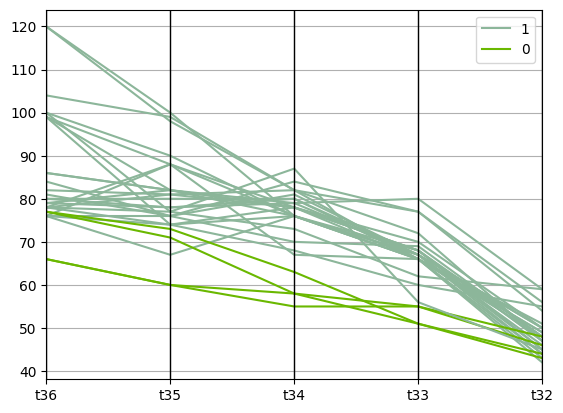

In [22]:
pd.plotting.parallel_coordinates(data, 'class_EM2', cols=X.columns)

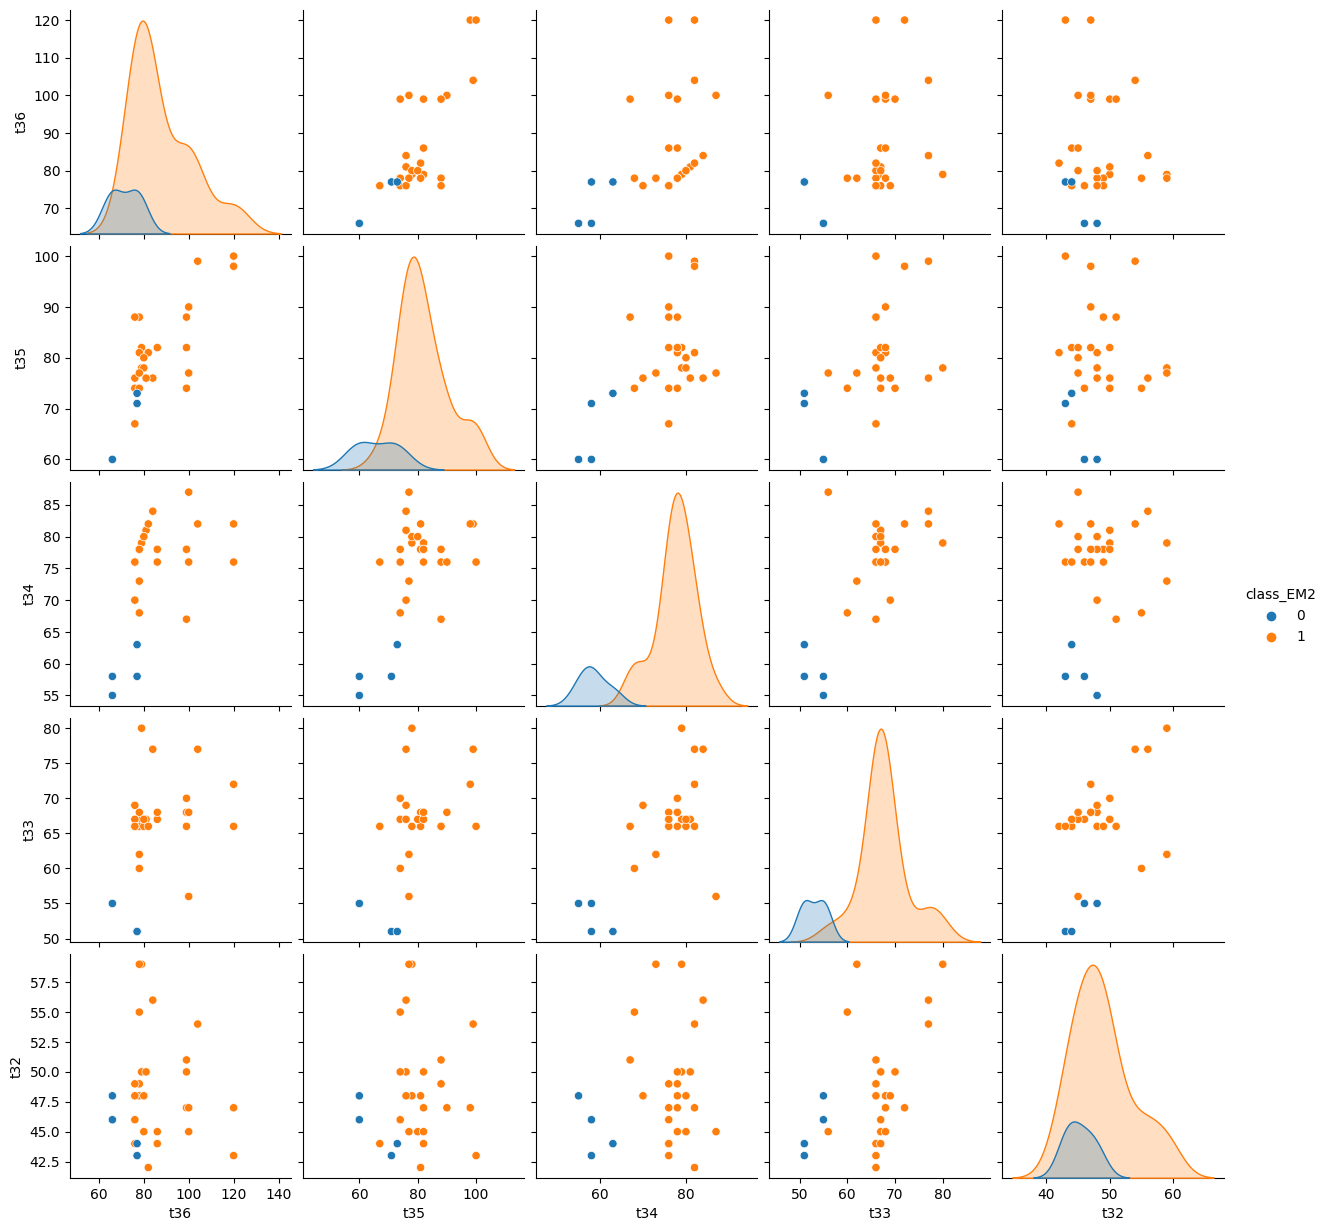

In [23]:
sns.pairplot(data, hue='class_EM2', vars=X.columns)

Таке розділення виглядає більш менш пристойно, але якна мене не є гарним варіантом. На багатьох графіках усі класи окрім нижнього виглядають як шум.

In [28]:
modelEM = mixture.GaussianMixture(n_components=4, init_params='k-means++', n_init=5)
modelEM.fit(X)
data['class_EM4'] = modelEM.predict(X)

<Axes: >

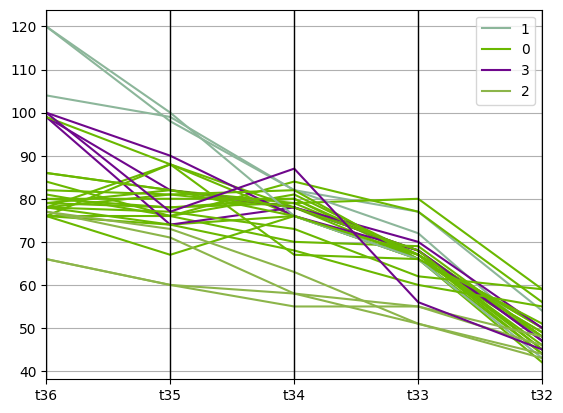

In [29]:
pd.plotting.parallel_coordinates(data, 'class_EM4', cols=X.columns)

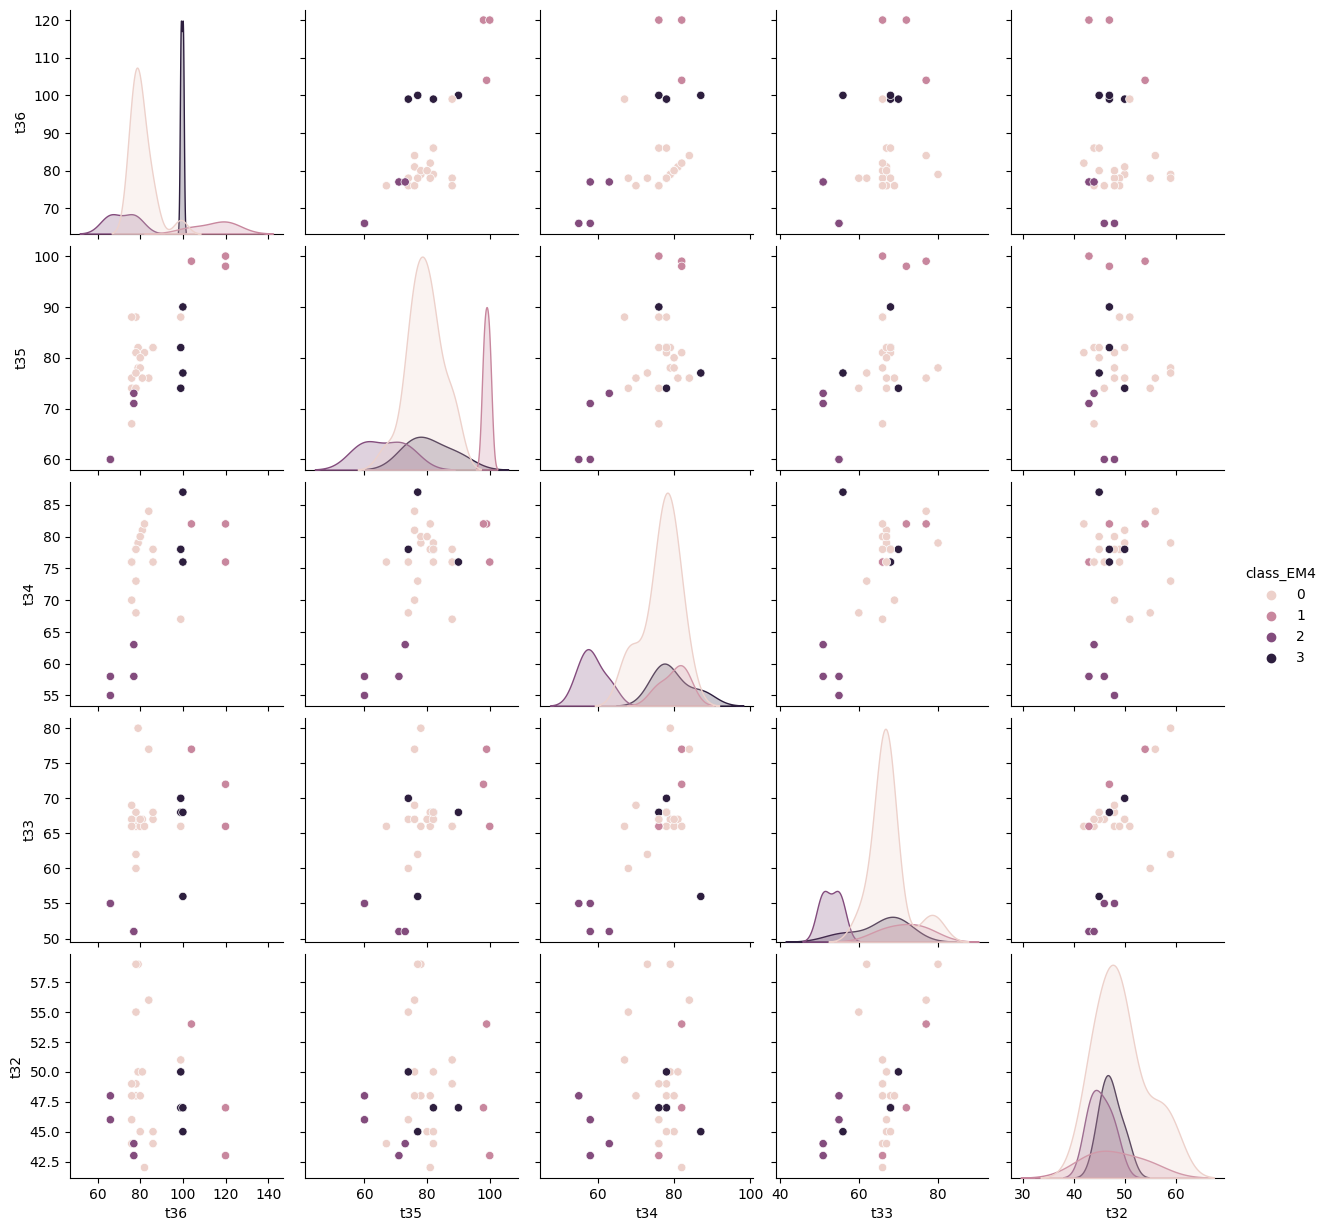

In [30]:
sns.pairplot(data, hue='class_EM4', vars=X.columns)

З шістьма класами отримуємо повну кашу. Така кількість класів це занадто для 20 об'єктів. Наприклад рожевий клас взагалі виглядає так ніби був виділений просто щоб набрати 6.

In [35]:
modelEM = mixture.GaussianMixture(n_components=6, init_params='k-means++', n_init=5)
modelEM.fit(X)
data['class_EM6'] = modelEM.predict(X)

<Axes: >

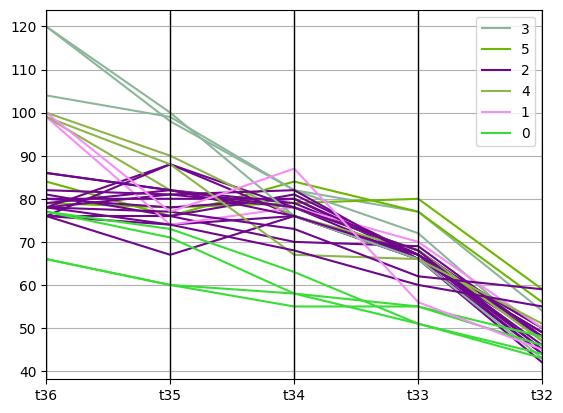

In [36]:
pd.plotting.parallel_coordinates(data, 'class_EM6', cols=X.columns)

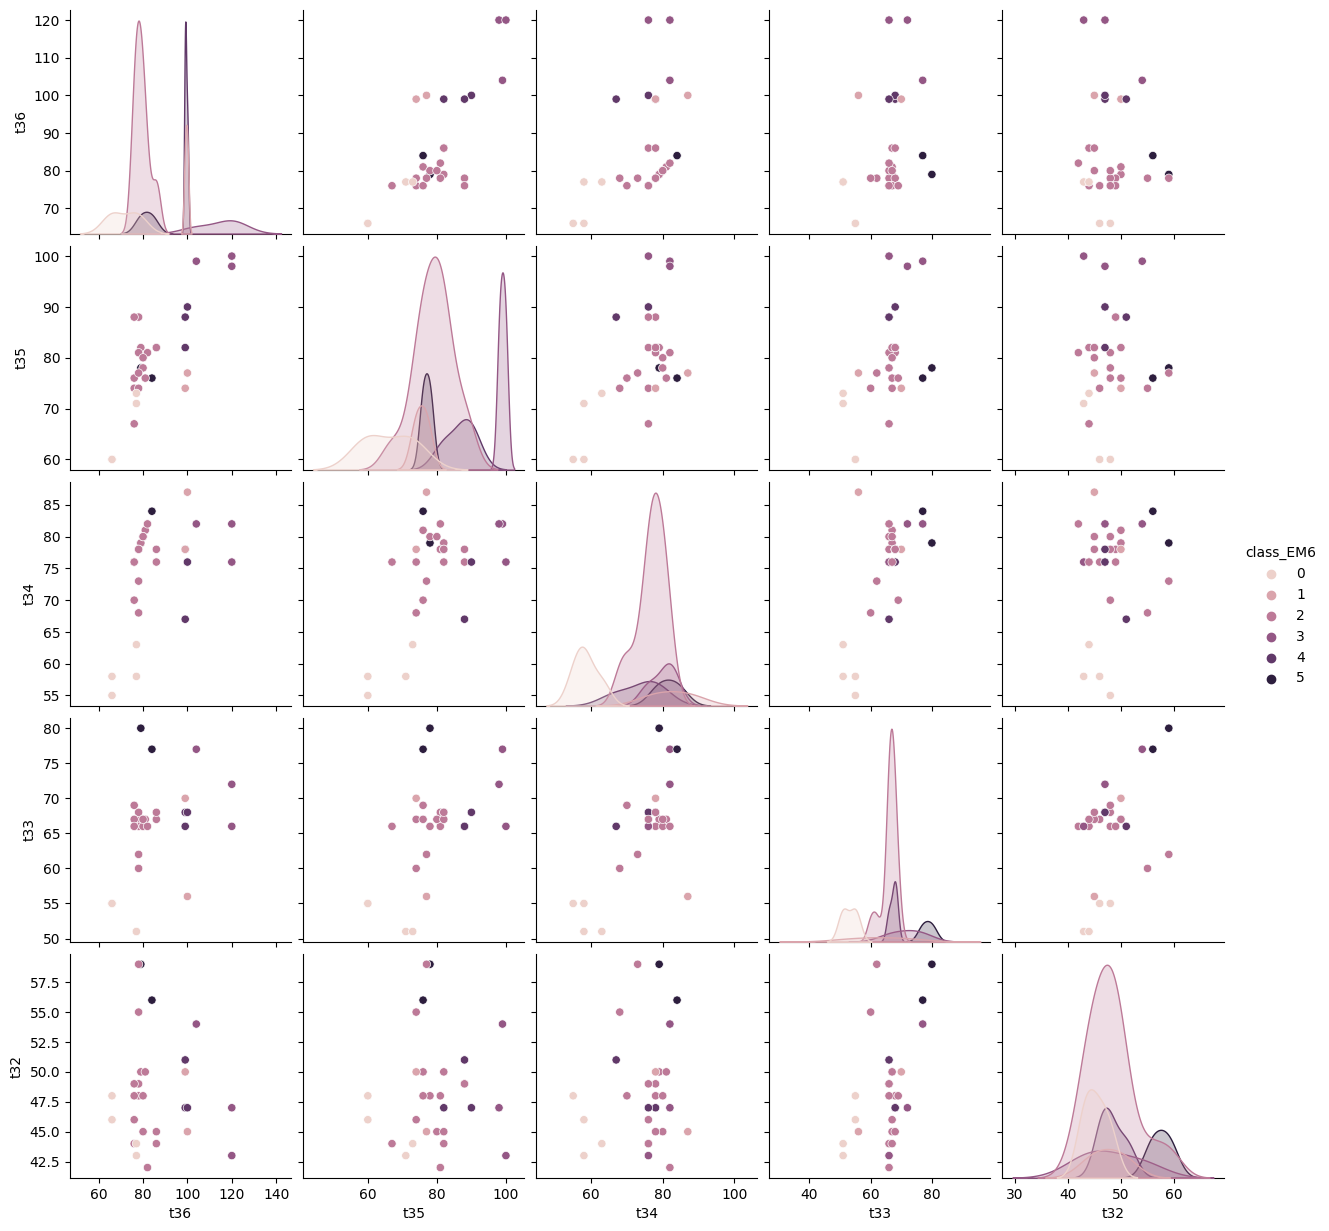

In [37]:
sns.pairplot(data, hue='class_EM6', vars=X.columns)

# Ієрархічні методи

Виходить, сінгл як і очікувалось від дуже чутливого до шумів алгоритму дав найгірші результати. Якщо і виділяти там декілька кластерів то ми отримаємо один величезний кластер і багато кластерів з одного чи 2-х компонентів, що не є підходящим результатом. Ward і Complete видали майже ідентичні результати. В їх дендрограмах чітко видно 2-3 великі кластери що виглядають доволі гарними і повними. Через майже повну ідентичність графіків надалі для оцінки буду використовувати тільки алгоритм Ward, як більш надійний. Далі average і weighted вони також дали майже ідентичні результати. В них розподілення на 2 чи 3 кластери дасть один великий кластер і два маленьких що виглядає не дуже підходящим розбиттям. Таке розбиття, як на мене, програє розбиттю на 2-3 кластери у Ward, але чітко видно красиве робиття на 4 кластери. Надалі буду досліджувати з цих двох тільки результати average через більш вдалий графік.

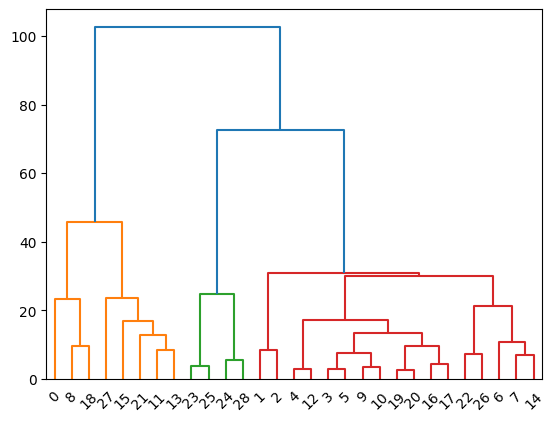

In [6]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='ward'))
#ward, complete, average, single, weighted

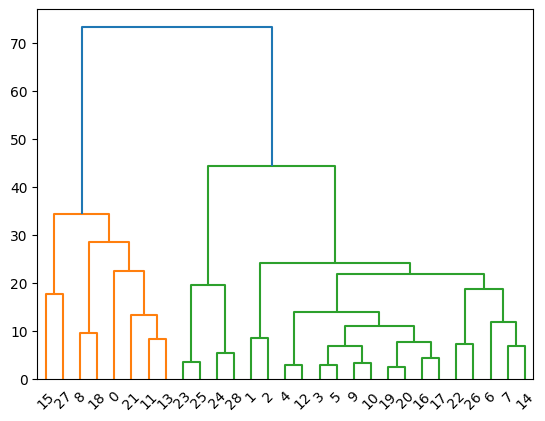

In [7]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='complete'))

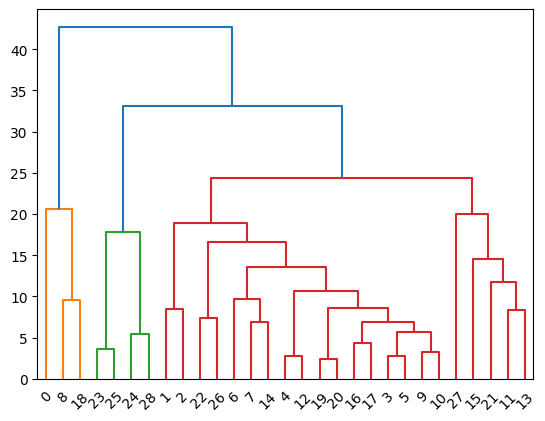

In [8]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='average'))

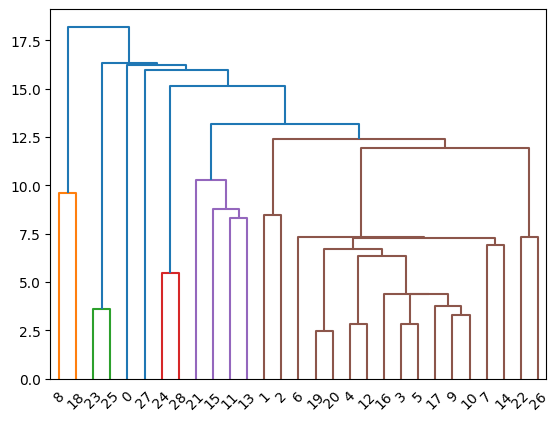

In [9]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='single'))

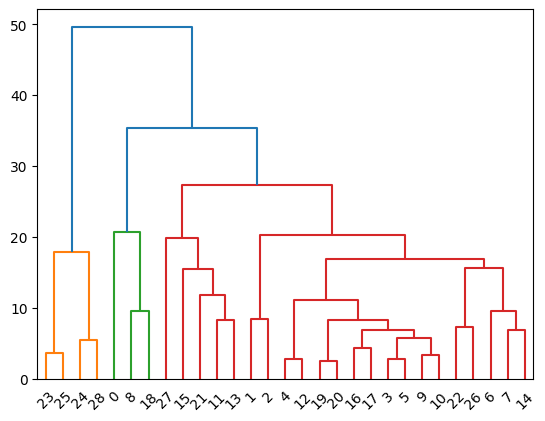

In [10]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='weighted'))

## Подивимось що кажуть індекси

Після перевірки індексів можна сказати що швидше за все для алгоритма Уорда підходить кількість кластерів в 3 (5 менш вірогідний через те що нанього вказує лише один показник та це забагато для 20 об'єктів я просто отримаю кашу) штуки а для середнього скоріше 4 (2 не бачу сенсу перевіряти бо з дендро графіку воно явно гірше за Уорда а 6 забагато для 20 об'єктів я просто отримаю кашу). 

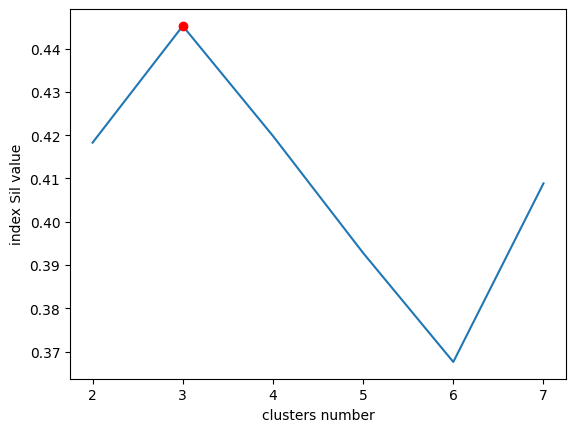

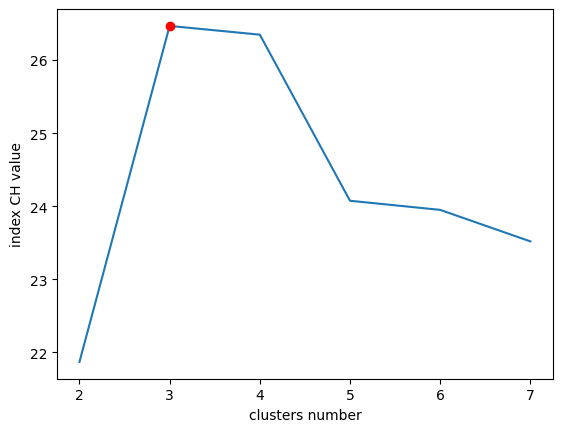

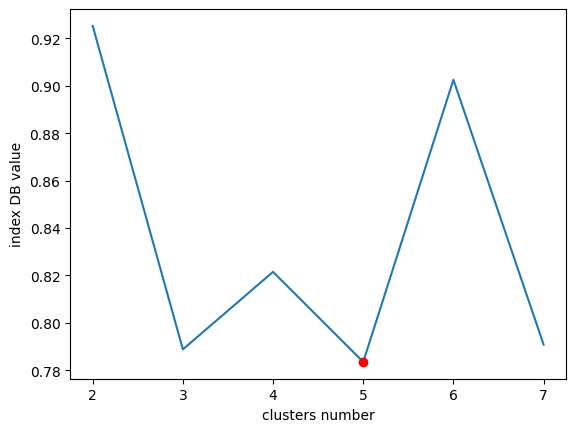

In [25]:
k_range = range(2, 8)

indValsSil = []
for k in k_range:
    lables = sklearn.cluster.AgglomerativeClustering(n_clusters=k,  linkage='ward').fit_predict(X)
    indValsSil.append(silhouette_score(X, lables))

indValsCH = []
for k in k_range:
    lables = sklearn.cluster.AgglomerativeClustering(n_clusters=k,  linkage='ward').fit_predict(X)
    indValsCH.append(calinski_harabasz_score(X, lables))

indValsDB = []
for k in k_range:
    lables = sklearn.cluster.AgglomerativeClustering(n_clusters=k,  linkage='ward').fit_predict(X)
    indValsDB.append(davies_bouldin_score(X, lables))

plt.plot(k_range, indValsSil)
bestSil = np.argmax(indValsSil)
plt.plot(k_range[bestSil], indValsSil[bestSil], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index Sil value")
plt.show()

plt.plot(k_range, indValsCH)
bestCH = np.argmax(indValsCH)
plt.plot(k_range[bestCH], indValsCH[bestCH], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index CH value")
plt.show()

plt.plot(k_range, indValsDB)
bestDB = np.argmin(indValsDB)
plt.plot(k_range[bestDB], indValsDB[bestDB], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index DB value")
plt.show()

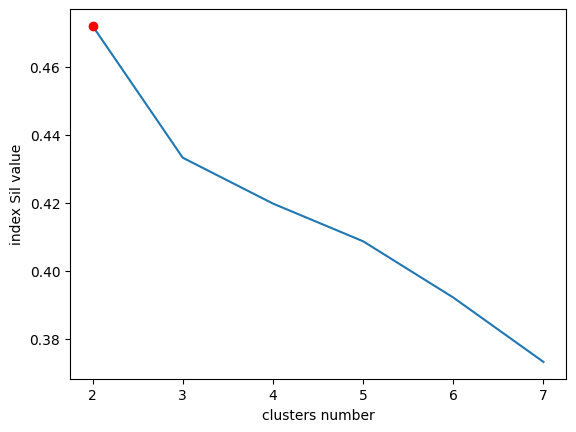

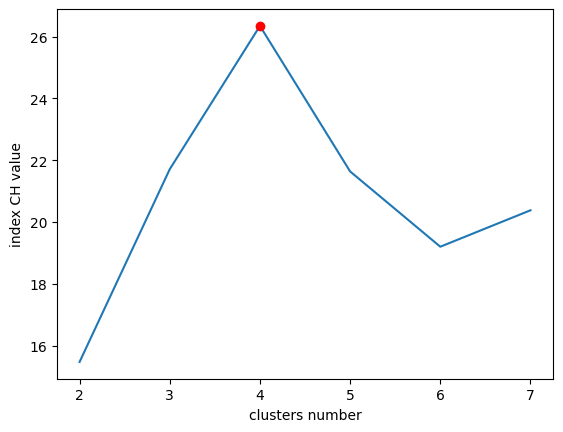

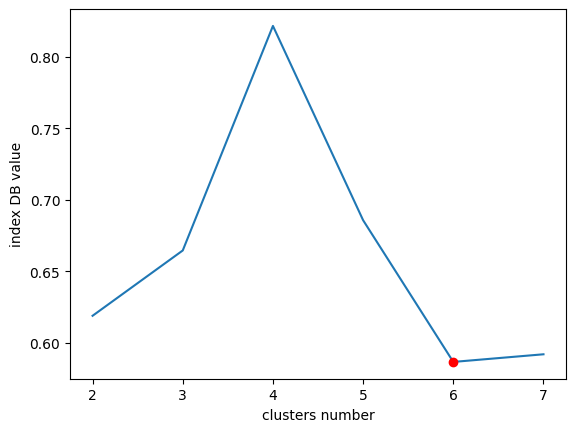

In [29]:
k_range = range(2, 8)

indValsSil = []
for k in k_range:
    lables = sklearn.cluster.AgglomerativeClustering(n_clusters=k,  linkage='average').fit_predict(X)
    indValsSil.append(silhouette_score(X, lables))

indValsCH = []
for k in k_range:
    lables = sklearn.cluster.AgglomerativeClustering(n_clusters=k,  linkage='average').fit_predict(X)
    indValsCH.append(calinski_harabasz_score(X, lables))

indValsDB = []
for k in k_range:
    lables = sklearn.cluster.AgglomerativeClustering(n_clusters=k,  linkage='average').fit_predict(X)
    indValsDB.append(davies_bouldin_score(X, lables))

plt.plot(k_range, indValsSil)
bestSil = np.argmax(indValsSil)
plt.plot(k_range[bestSil], indValsSil[bestSil], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index Sil value")
plt.show()

plt.plot(k_range, indValsCH)
bestCH = np.argmax(indValsCH)
plt.plot(k_range[bestCH], indValsCH[bestCH], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index CH value")
plt.show()

plt.plot(k_range, indValsDB)
bestDB = np.argmin(indValsDB)
plt.plot(k_range[bestDB], indValsDB[bestDB], marker='o', color='red')
plt.xlabel("clusters number")
plt.ylabel("index DB value")
plt.show()

# Тоді якщо підсумувати найвдалішими вийшли Ward на 2-3 кластери і average на 4 кластери.

## Ward на 2 кластери:

Розбиття доволі непогане хоч і має совї недоліки. Графік паралельних координат виглядає доволі непогано і логідно - були виділені в різні класи об'єкти з високим початковим пульсом і з низьким початковим пульсом, це доволі логічно, такяк у кінці значення пульсу збігаєтся до значно вужчого діапазону, стаючи майже рівним в усіх індевідів. Попарний графік виглядає доволі непогано. На багатьох графіках залежності пар показників видно чітке розділення класів, хоча є і графіки де розділення виглядає майже рандомним. Нажаль з зменшенням температури усі класи зліпляются в одну кучу через що я вважаю що це розбиття значно уступає розбиттю EM2.

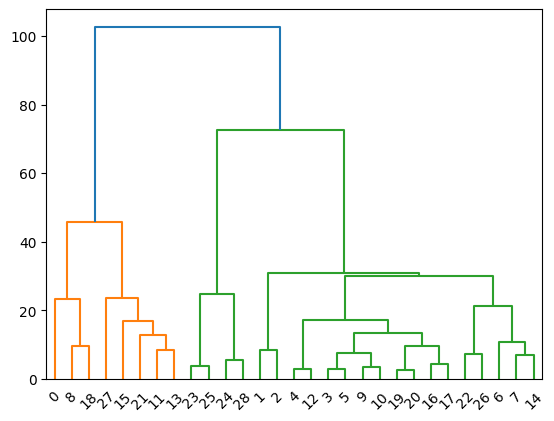

In [11]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='ward'), color_threshold=80)

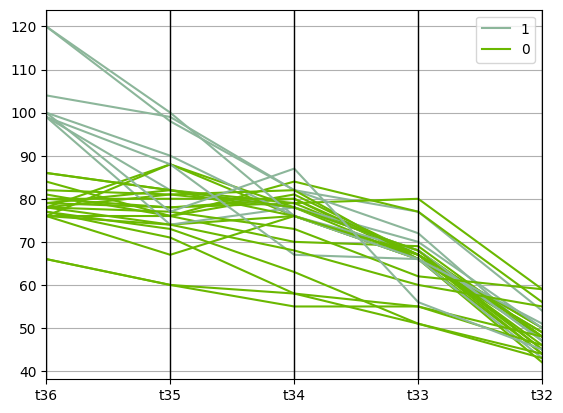

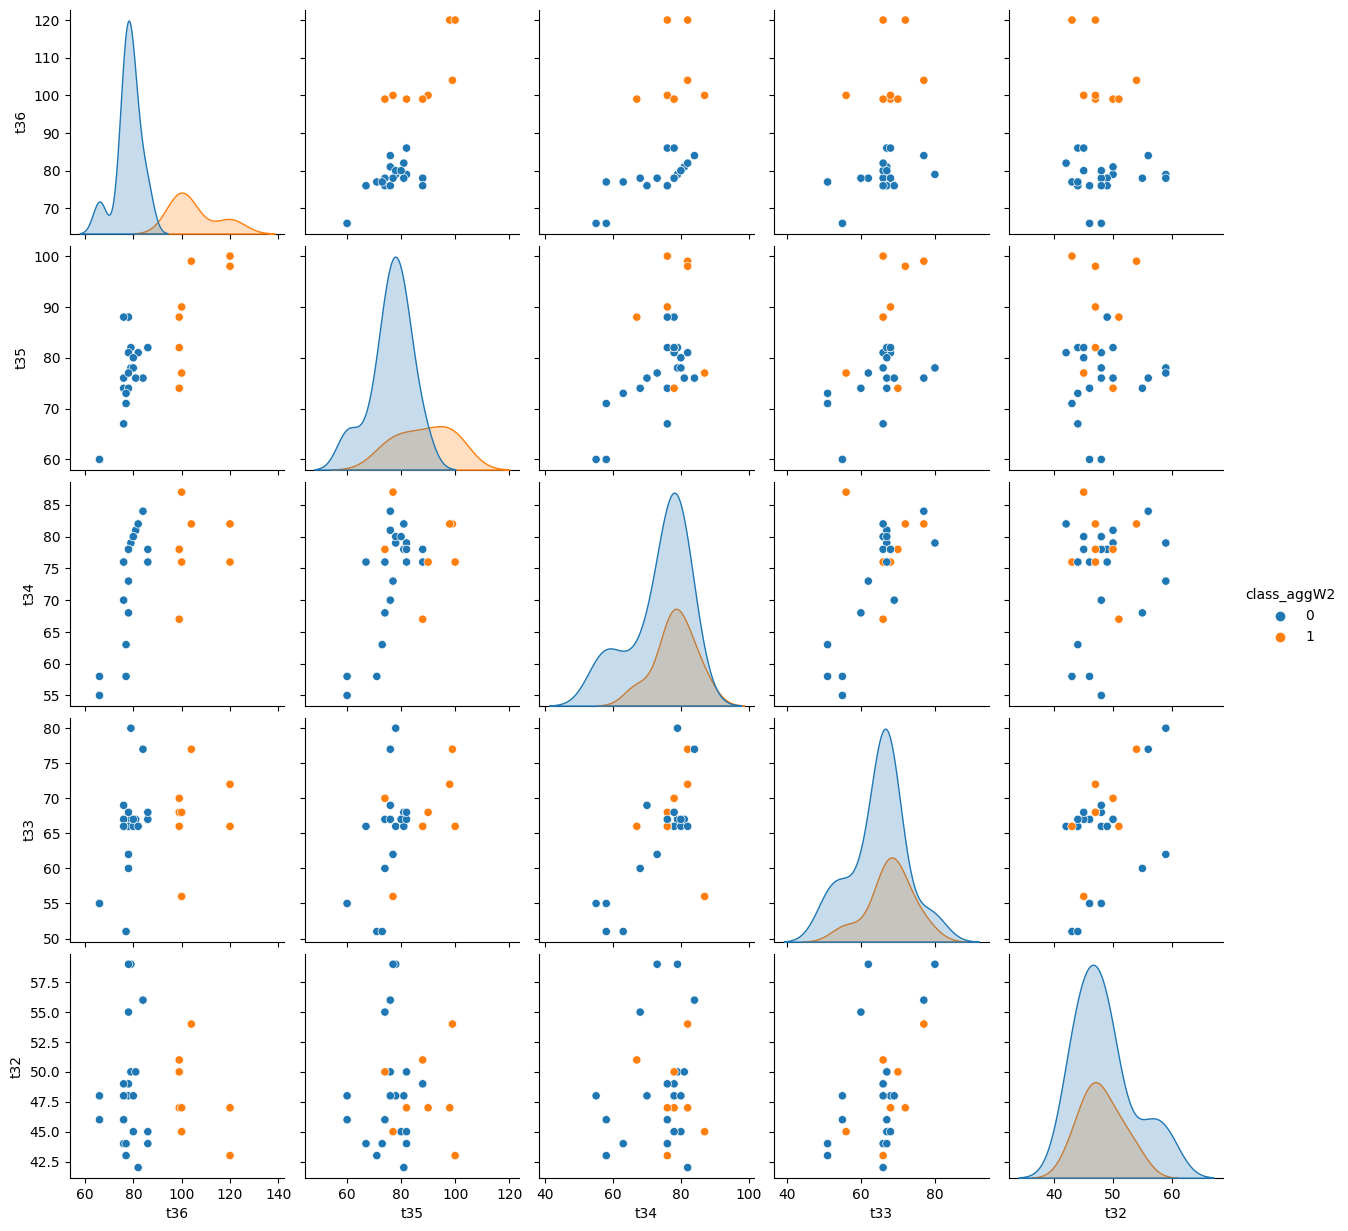

In [19]:
modelAggW2 = sklearn.cluster.AgglomerativeClustering(n_clusters=2,  linkage='ward')
modelAggW2.fit(X)
data['class_aggW2'] = modelAggW2.labels_
pd.plotting.parallel_coordinates(data, 'class_aggW2', cols=X.columns)
sns.pairplot(data, hue='class_aggW2', vars=X.columns)

## Ward на 3 кластери:

Тут також непоганий результат він майже ідентичний з результатом k-means для трьох кластерів. Усе доволі непогано. Графік паралельних кординат виглядає органічно з трьома класами - об'єкти з високим початковим пульсом, середнім і низьким. Попарний графік майже ідентичний з k-means, не бачу сенсу розбирати його знову.

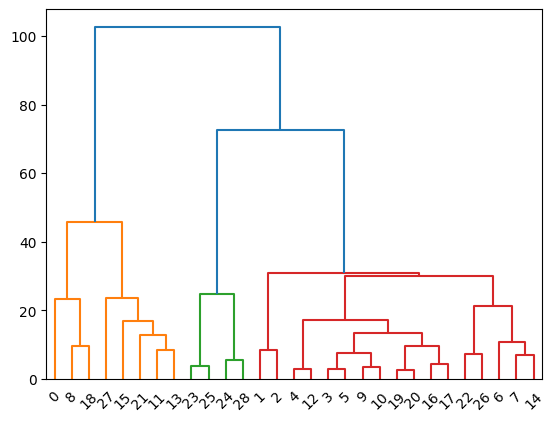

In [12]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='ward'), color_threshold=60)

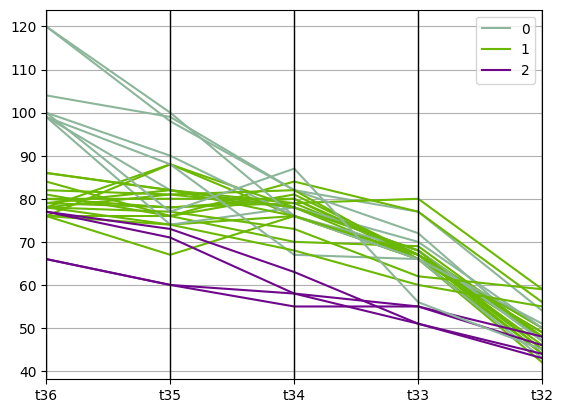

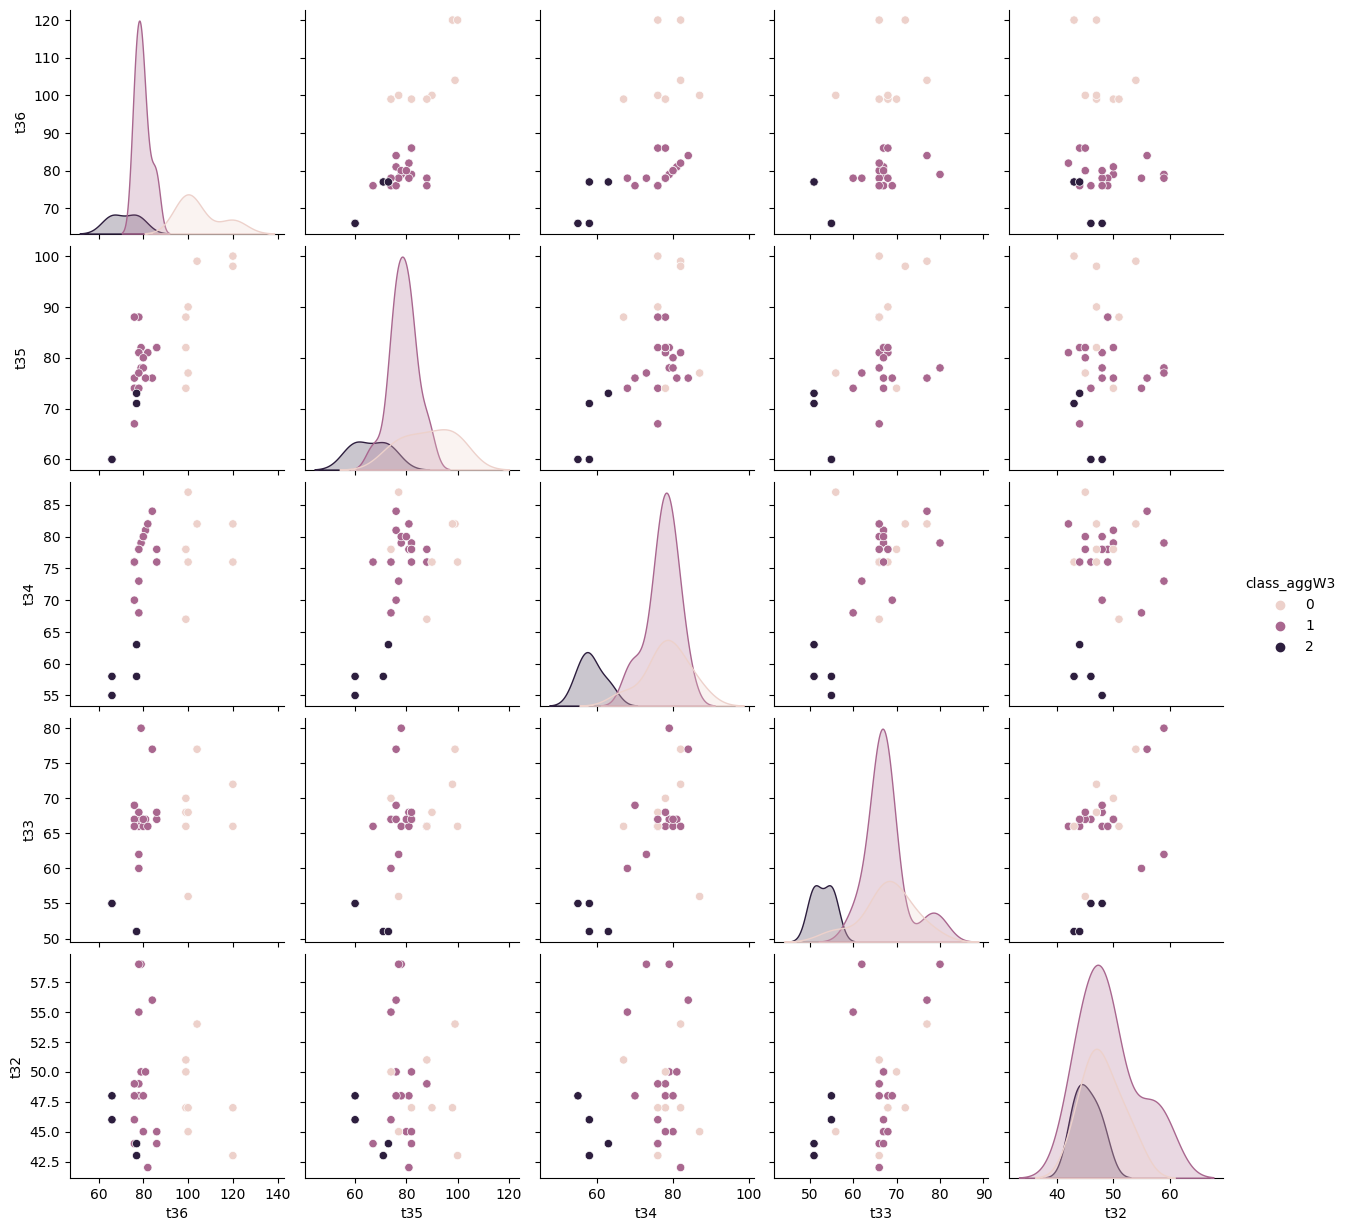

In [20]:
modelAggW3 = sklearn.cluster.AgglomerativeClustering(n_clusters=3,  linkage='ward')
modelAggW3.fit(X)
data['class_aggW3'] = modelAggW3.labels_
pd.plotting.parallel_coordinates(data, 'class_aggW3', cols=X.columns)
sns.pairplot(data, hue='class_aggW3', vars=X.columns)

## Average на 4 кластери

Average дає теж непогане розбиття майже ідентичне до розбиття EM4, але як на мене воно більш вдале. Розділення при вишій температурі видно доволі чітко але з часом усі окрім нижчого класу згрібаются в одну кучу.

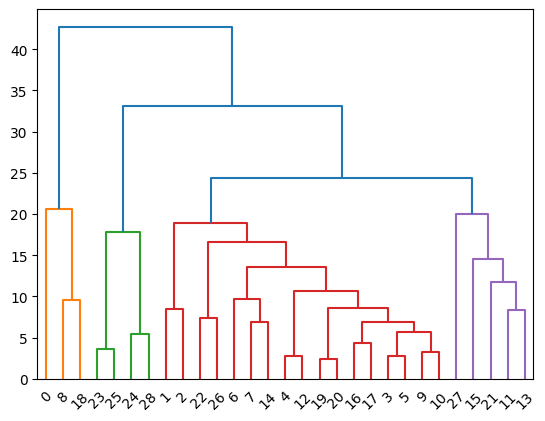

In [13]:
res = cluster.hierarchy.dendrogram(cluster.hierarchy.linkage(X, method='average'), color_threshold=23)

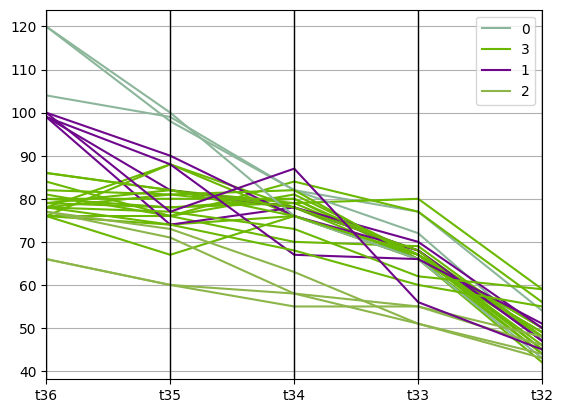

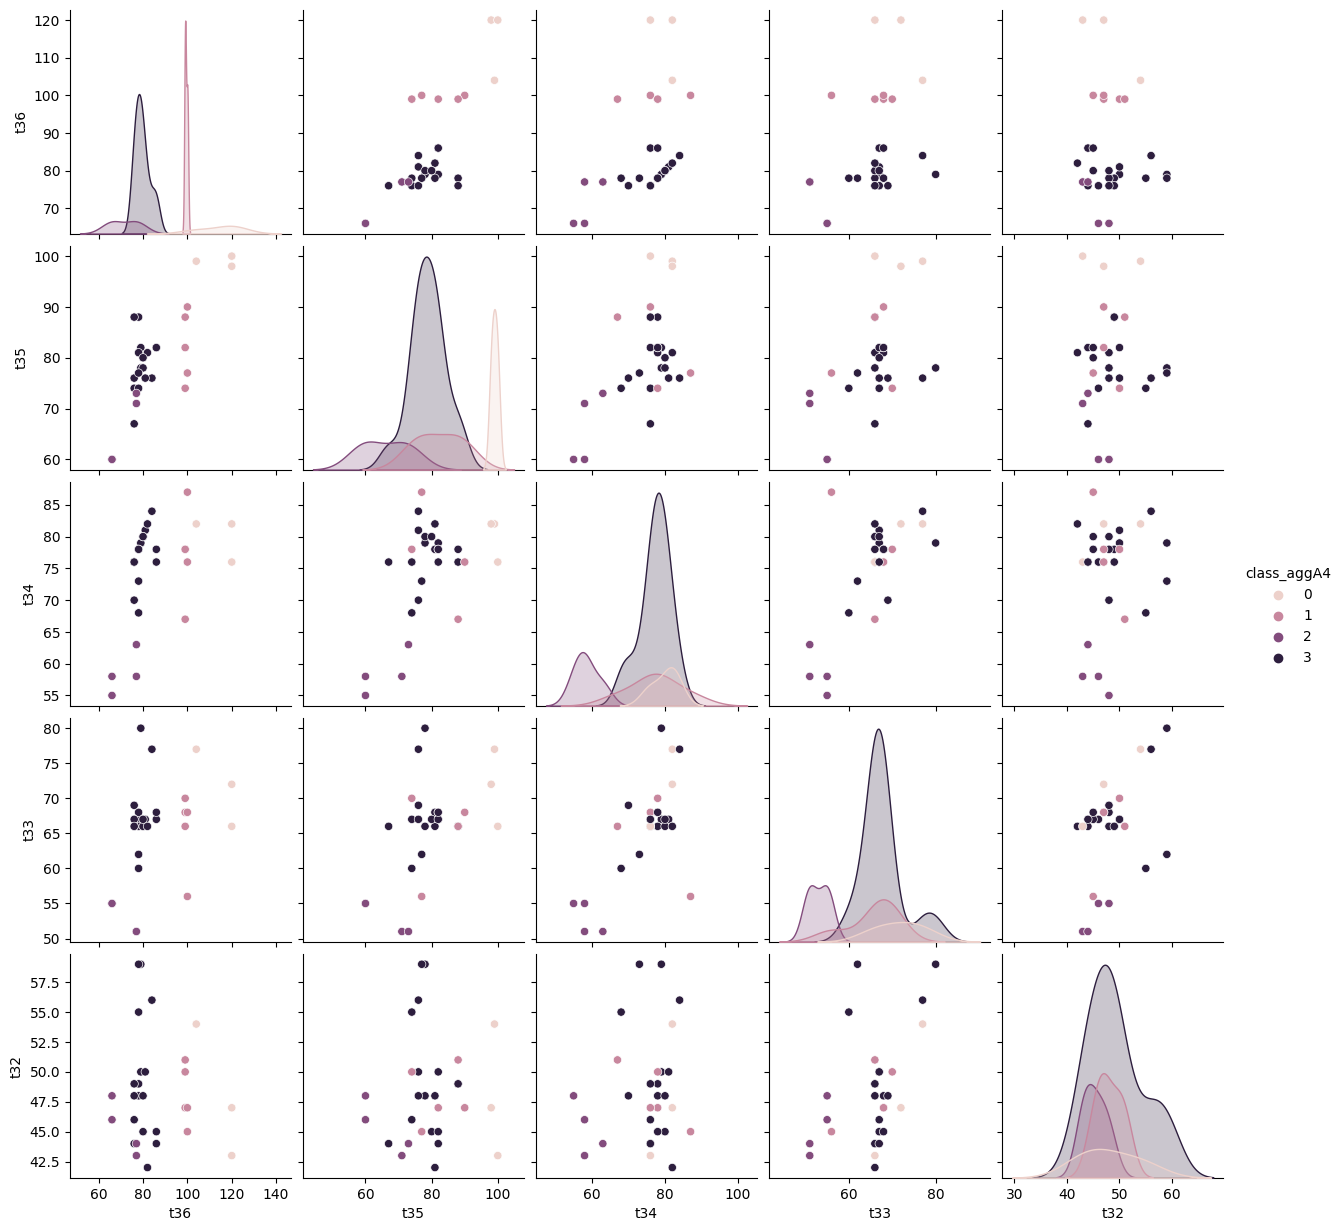

In [30]:
modelAggA4 = sklearn.cluster.AgglomerativeClustering(n_clusters=4,  linkage='average')
modelAggA4.fit(X)
data['class_aggA4'] = modelAggA4.labels_
pd.plotting.parallel_coordinates(data, 'class_aggA4', cols=X.columns)
sns.pairplot(data, hue='class_aggA4', vars=X.columns)

# Висновок

Отже висновок можна зробити такий - найкраще розділення було досягнуто за допомогою EM алгоритму при розділенні усього масиву даних на два кластери. Ці кластери у цьому розділені чітко видні на графіку паралельних кординат та попарних співідношень ознак.

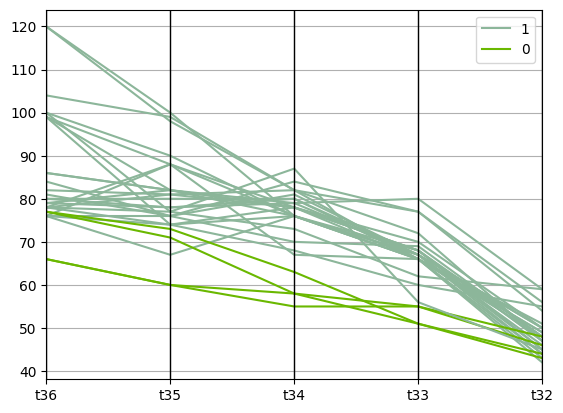

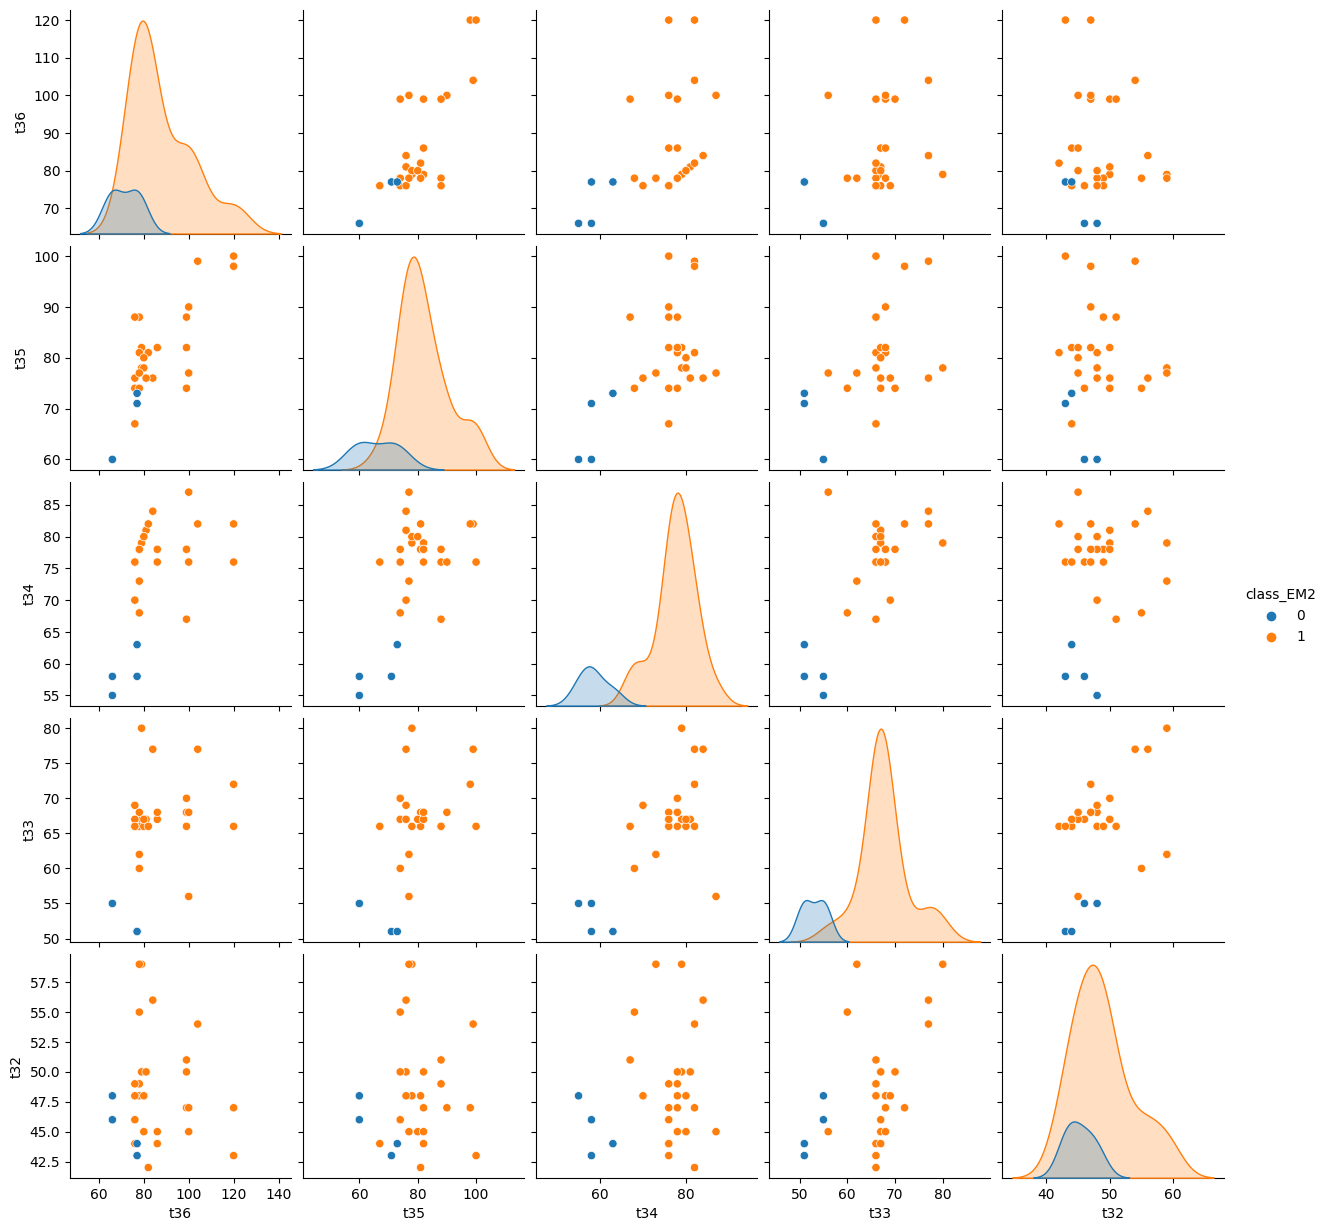

In [33]:
pd.plotting.parallel_coordinates(data, 'class_EM2', cols=X.columns)
sns.pairplot(data, hue='class_EM2', vars=X.columns)

Зразу за ним йде ще одне розділення. Це ієрархічний алгоритм з методом Уорда що розділяє данні на 3 кластери. Це розділення зберігає нульовий кластер з минулого розділення і виділяє з першого два нових кластери. Він виглядає доволі пристойно, хоча два нових кластери при менших температурах зливаются в один.

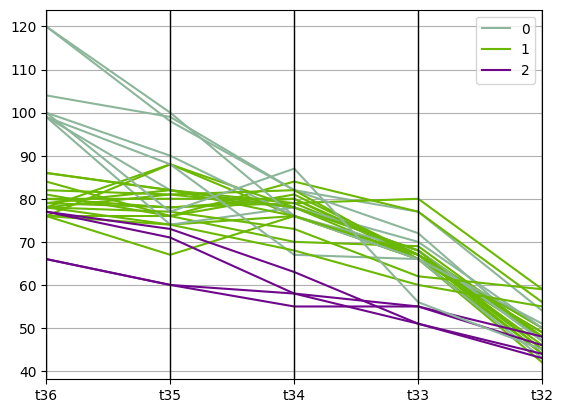

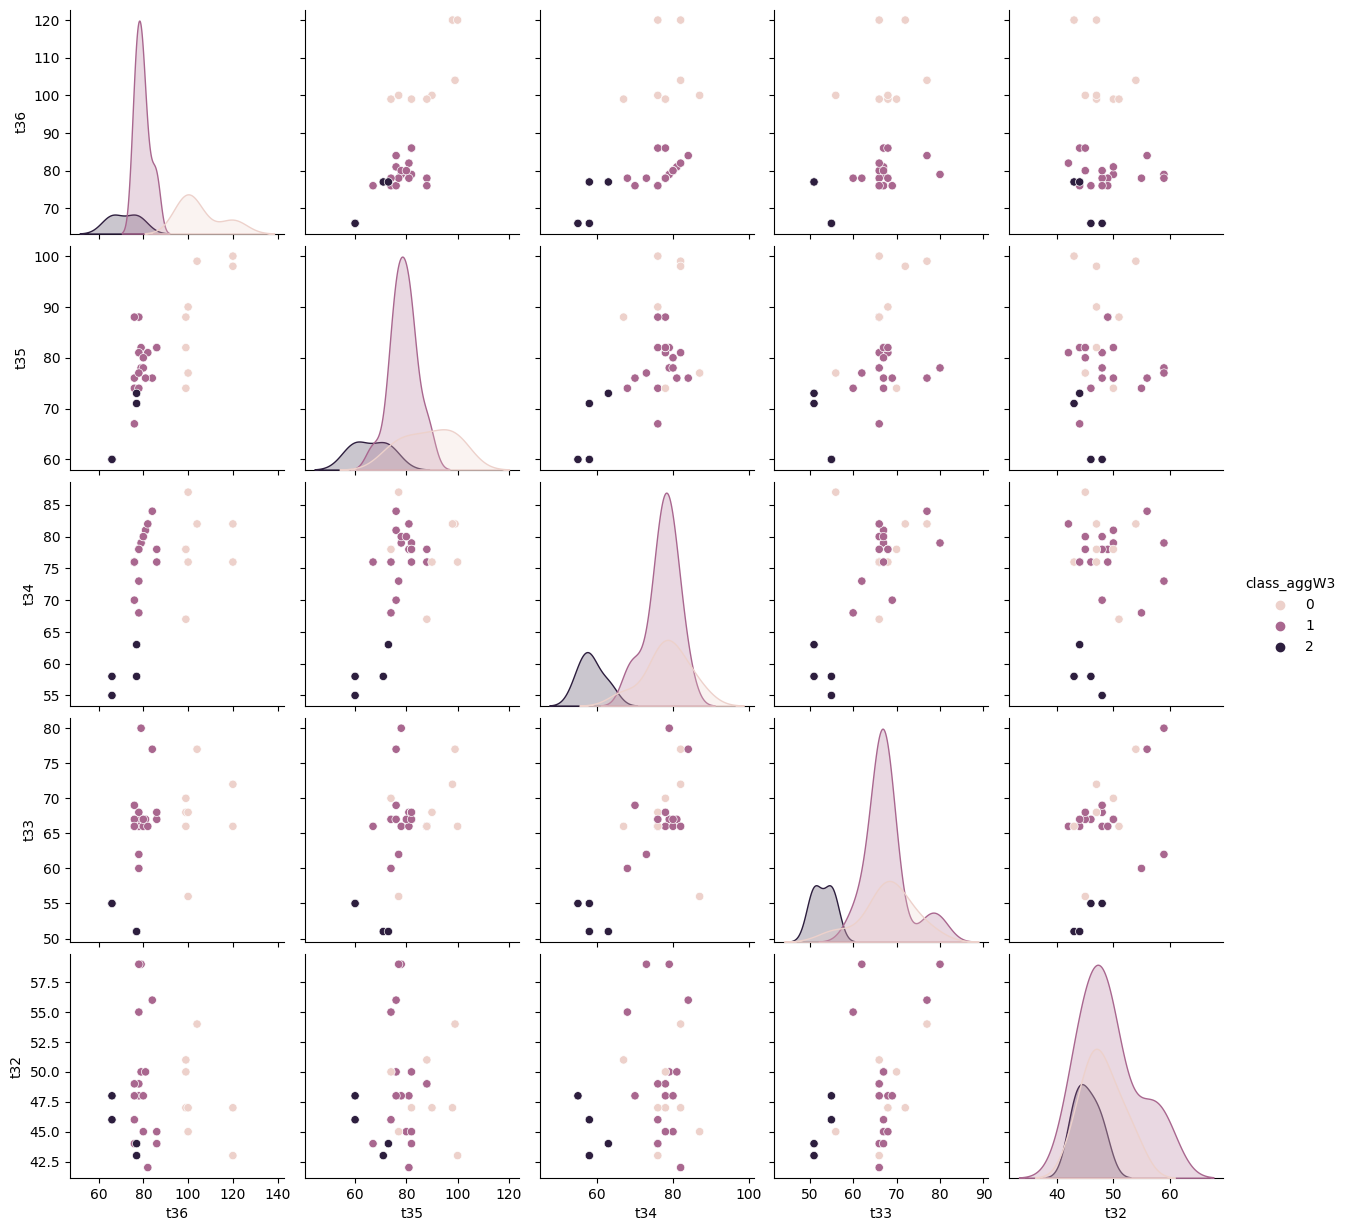

In [34]:
pd.plotting.parallel_coordinates(data, 'class_aggW3', cols=X.columns)
sns.pairplot(data, hue='class_aggW3', vars=X.columns)

Усі інші розділення на мою думку не є дуже точними, вони або є кашою з завеликою кількістю класів для 20 об'єктів, або подібні до двох наведений з більшими недоліками ніж у них.